In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
data_dir = os.path.dirname(os.getcwd())
data_dir

'D:\\Dimaond_Price_Prediction'

In [3]:
train_dir = os.path.join(data_dir, r'Actual_Data\train.csv')
test_dir = os.path.join(data_dir, r'Actual_Data\test.csv')

In [4]:
train = pd.read_csv(train_dir)
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
test = pd.read_csv(test_dir)
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
train.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


## Numerical (Continous) Feature

In [10]:
continous_feature = [feature for feature in train.columns if train[feature].dtypes != 'O']
print(f'Continous Feature Count : {len(continous_feature)}')
train[continous_feature].head()

Continous Feature Count : 8


,id,carat,depth,table,x,y,z,price
0,0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,62.6,59.0,7.65,7.61,4.77,14453


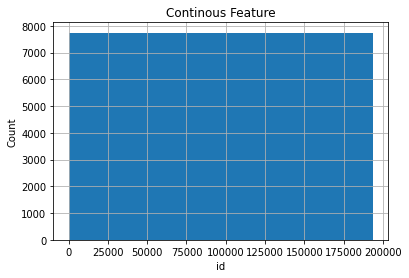

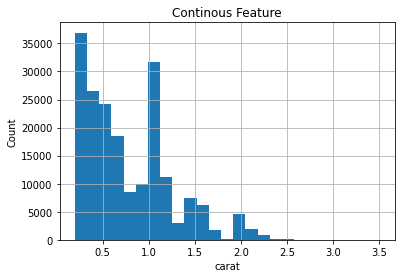

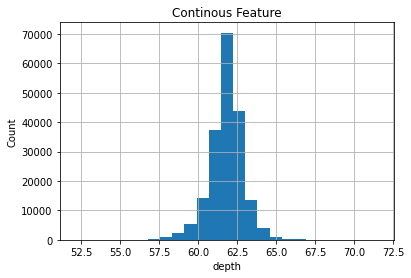

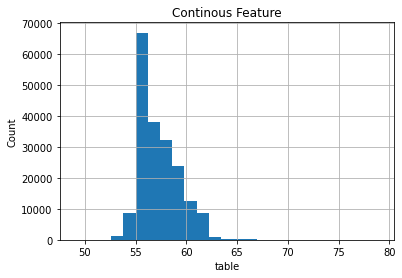

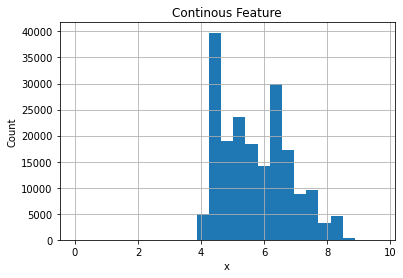

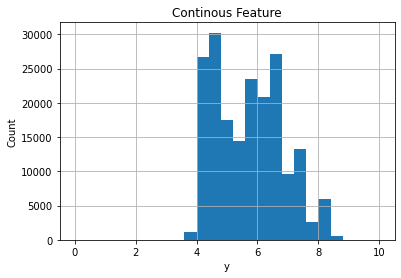

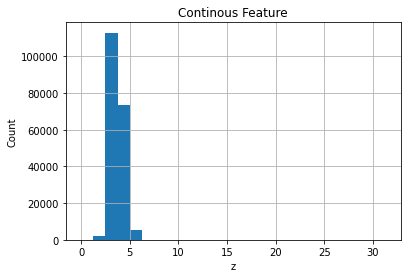

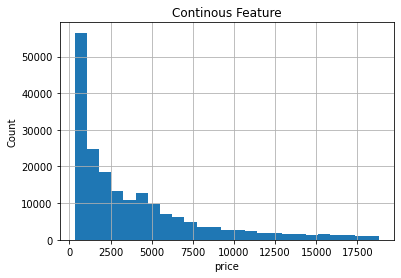

In [11]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continous_feature:
    data = train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Continous Feature')
    plt.show()

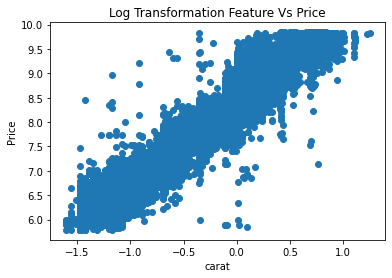

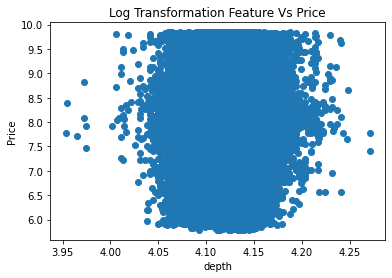

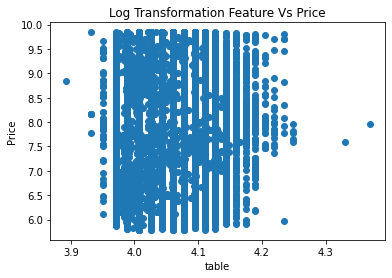

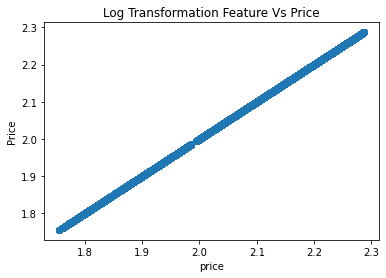

In [12]:
## We will be using logrithemic transformation to check effect of contionos feature on price
for feature in continous_feature:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['price'] = np.log(data['price'])
        plt.scatter(data[feature], data['price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title('Log Transformation Feature Vs Price')
        plt.show()

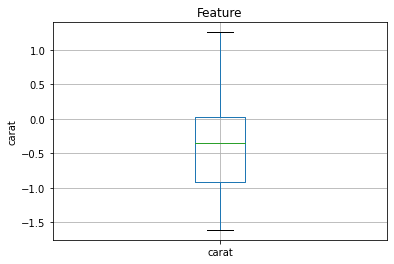

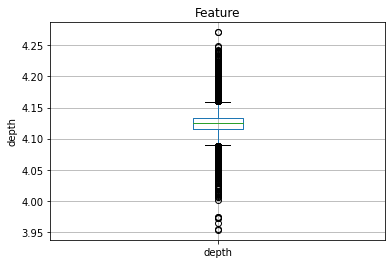

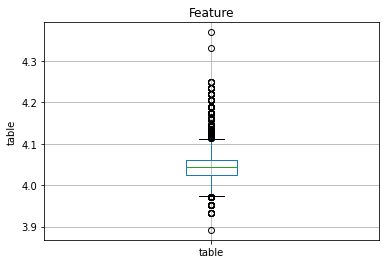

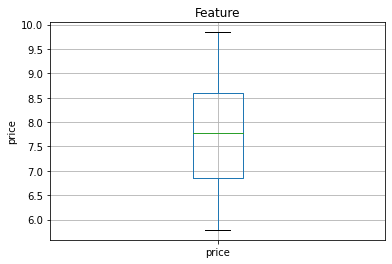

In [14]:
## Find Out The Outliers
for feature in continous_feature:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(feature)
        plt.ylabel(feature)
        plt.title('Feature')
        plt.show()

In [15]:
## Calculating Outlier For Continous Feature
Q1 = train[continous_feature].quantile(0.25)
Q3 = train[continous_feature].quantile(0.75)

IQR = Q3 - Q1

((train[continous_feature] < (Q1 - 1.5* (IQR))) | (train[continous_feature] > (Q3 + 1.5* (IQR)))).sum()

id           0
carat     7653
depth     9930
table     4366
x           17
y           14
z           18
price    12649
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x16afb6d7c70>,
 'caps': [<matplotlib.lines.Line2D at 0x16afb6d6a40>,
 'boxes': [<matplotlib.lines.Line2D at 0x16afb6d7910>],
 'medians': [<matplotlib.lines.Line2D at 0x16afb6d5450>],
 'fliers': [<matplotlib.lines.Line2D at 0x16afb6d5330>],
 'means': []}

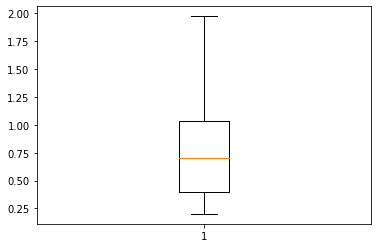

In [17]:
# HANDLING THE OUTLIER
q75, q25 = np.percentile(train['carat'],[75,25])
iqr = q75 - q25
minimum = q25 - 1.5 * iqr
maximum = q75 + 1.5 * iqr
train.loc[train['carat'] < minimum, "carat"] = minimum
train.loc[train['carat'] > maximum, "carat"] = maximum

plt.boxplot(train['carat'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16afb20b070>,
 'caps': [<matplotlib.lines.Line2D at 0x16afb20b790>,
 'boxes': [<matplotlib.lines.Line2D at 0x16afb208a30>],
 'medians': [<matplotlib.lines.Line2D at 0x16afb20a470>],
 'fliers': [<matplotlib.lines.Line2D at 0x16afb208b50>],
 'means': []}

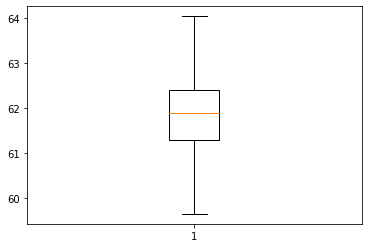

In [18]:
# HANDLING THE OUTLIER
q75, q25 = np.percentile(train['depth'],[75,25])
iqr = q75 - q25
minimum = q25 - 1.5 * iqr
maximum = q75 + 1.5 * iqr
train.loc[train['depth'] < minimum, "depth"] = minimum
train.loc[train['depth'] > maximum, "depth"] = maximum

plt.boxplot(train['depth'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16afb9e8970>,
 'caps': [<matplotlib.lines.Line2D at 0x16afb9ea440>,
 'boxes': [<matplotlib.lines.Line2D at 0x16afb9ebf70>],
 'medians': [<matplotlib.lines.Line2D at 0x16afb9eaf50>],
 'fliers': [<matplotlib.lines.Line2D at 0x16afb9ea020>],
 'means': []}

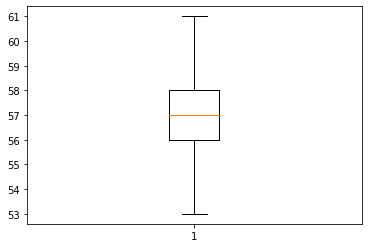

In [19]:
# HANDLING THE OUTLIER
q75, q25 = np.percentile(train['table'],[75,25])
iqr = q75 - q25
minimum = q25 - 1.5 * iqr
maximum = q75 + 1.5 * iqr
train.loc[train['table'] < minimum, "table"] = minimum
train.loc[train['table'] > maximum, "table"] = maximum

plt.boxplot(train['table'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16a814467d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16a81446b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a814465c0>],
 'medians': [<matplotlib.lines.Line2D at 0x16a814476d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a81447be0>],
 'means': []}

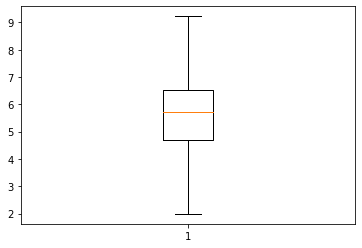

In [22]:
# HANDLING THE OUTLIER
q75, q25 = np.percentile(train['x'],[75,25])
iqr = q75 - q25
minimum = q25 - 1.5 * iqr
maximum = q75 + 1.5 * iqr
train.loc[train['x'] < minimum, "x"] = minimum
train.loc[train['x'] > maximum, "x"] = maximum

plt.boxplot(train['x'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16a80c675b0>,
 'caps': [<matplotlib.lines.Line2D at 0x16a80c67940>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a80c67040>],
 'medians': [<matplotlib.lines.Line2D at 0x16a80c4cf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a80c4d2d0>],
 'means': []}

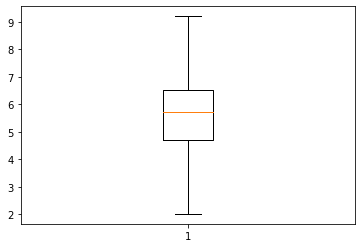

In [23]:
# HANDLING THE OUTLIER
q75, q25 = np.percentile(train['y'],[75,25])
iqr = q75 - q25
minimum = q25 - 1.5 * iqr
maximum = q75 + 1.5 * iqr
train.loc[train['y'] < minimum, "y"] = minimum
train.loc[train['y'] > maximum, "y"] = maximum

plt.boxplot(train['y'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16a80c99c60>,
 'caps': [<matplotlib.lines.Line2D at 0x16a80c999f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a80c9a2f0>],
 'medians': [<matplotlib.lines.Line2D at 0x16a80c99480>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a80c99210>],
 'means': []}

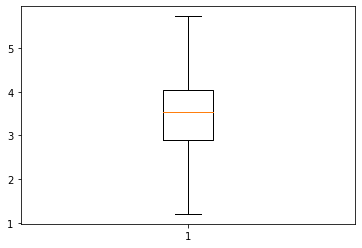

In [24]:
# HANDLING THE OUTLIER
q75, q25 = np.percentile(train['z'],[75,25])
iqr = q75 - q25
minimum = q25 - 1.5 * iqr
maximum = q75 + 1.5 * iqr
train.loc[train['z'] < minimum, "z"] = minimum
train.loc[train['z'] > maximum, "z"] = maximum

plt.boxplot(train['z'])

In [25]:
## Calculating Outlier For Continous Feature after handeling outlier
Q1 = train[continous_feature].quantile(0.25)
Q3 = train[continous_feature].quantile(0.75)

IQR = Q3 - Q1

((train[continous_feature] < (Q1 - 1.5* (IQR))) | (train[continous_feature] > (Q3 + 1.5* (IQR)))).sum()

id           0
carat        0
depth        0
table        0
x            0
y            0
z            0
price    12649
dtype: int64

## Categorical Feature

In [28]:
categorical_feature = [feature for feature in train.columns if train[feature].dtype == 'O']
print(f'Number of Categorical Feature : {categorical_feature}')
train[categorical_feature].head()

Number of Categorical Feature : ['cut', 'color', 'clarity']


,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2


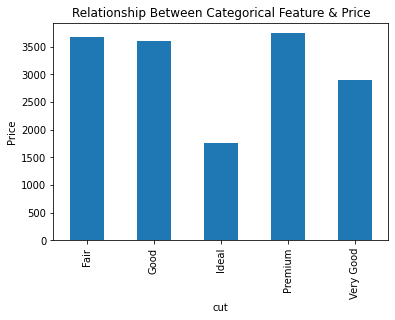

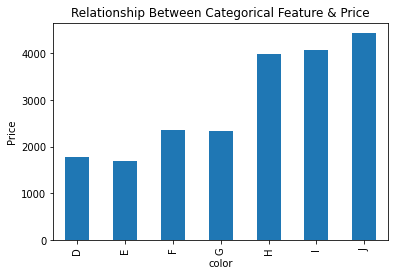

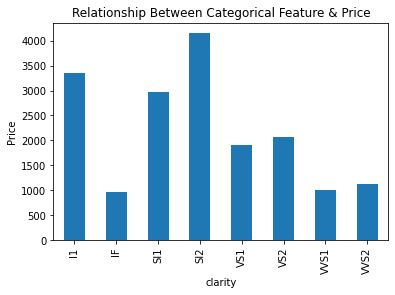

In [30]:
## Find out the reltionnship between categorical feature and price
for  feature in categorical_feature:
    data = train.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title('Relationship Between Categorical Feature & Price')
    plt.show()

<AxesSubplot:>

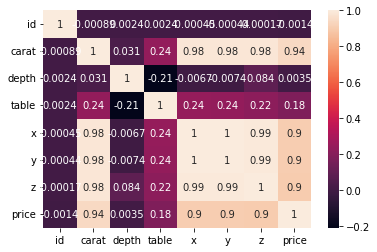

In [31]:
sns.heatmap(train[continous_feature].corr(), annot=True)